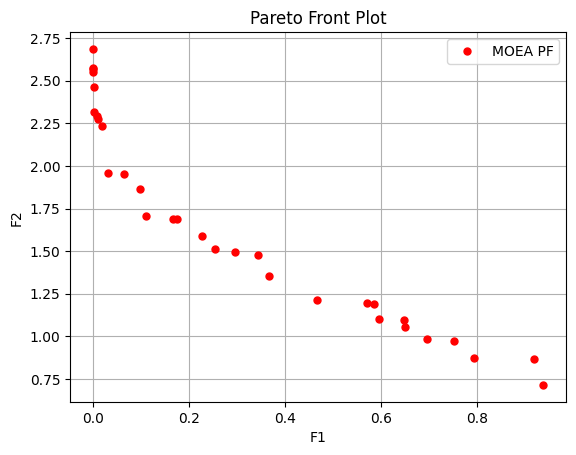

Execution time: 72.09007596969604 s
Evaluation number: 2000000
The number of non-dominated solutions is: 31
hv: 0.56635
spacing: 0.04597
{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the generation limit.', 'optPop': <geatpy.Population.Population object at 0x0000019AB3923820>, 'lastPop': <geatpy.Population.Population object at 0x0000019AB39236D0>, 'Vars': array([[2.54165904e-01, 2.15467253e-02, 2.34389306e-01, 3.69285235e-02,
        1.26899835e-01, 1.90319233e-01, 7.66648355e-02, 2.75895746e-02,
        9.72959775e-02, 2.60086675e-01, 2.36525667e-01, 5.18098028e-01,
        2.46597082e-02, 3.80760544e-01, 1.22566075e-01, 1.11518037e-01,
        1.24153086e-01, 1.30928401e-01, 3.43221632e-01, 7.01336752e-02,
        1.15180370e-01, 9.82725996e-03, 2.14246475e-02, 1.75303668e-01,
        2.49710065e-01, 3.27168406e-02, 6.10388818e-05, 3.06354148e-01,
        3.84544955e-03, 3.96142343e-02],
       [1.64804981e-03, 1.61447842e-01, 7.73362632e-02, 1.18415431e-02,

In [19]:
# -*- coding: utf-8 -*-
"""Demo.
标准测试函数ZDT1
"""
import numpy as np
import geatpy as ea


class MyProblem(ea.Problem):  # 继承Problem父类

    def __init__(self, M=2):
        name = 'MyProblem'  # 初始化name（函数名称，可以随意设置）
        Dim = 30  # 初始化Dim（决策变量维数）
        maxormins = [1] * M  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        varTypes = [0] * Dim  # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [0] * Dim  # 决策变量下界
        ub = [1] * Dim  # 决策变量上界
        lbin = [1] * Dim  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1] * Dim  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self,
                            name,
                            M,
                            maxormins,
                            Dim,
                            varTypes,
                            lb,
                            ub,
                            lbin,
                            ubin)

    def evalVars(self, Vars):  # 目标函数
        f1 = Vars[:, 0]
        gx = 1+9*np.sum( Vars[:,1:] , axis=1)/(self.Dim-1)
        f2 = gx * ( 1-(f1/gx)**0.5 )

        CV = np.zeros((Vars.shape[0],1))
        f1 = np.expand_dims(f1, axis=1)
        f2 = np.expand_dims(f2, axis=1)
        f = np.hstack([f1, f2])
        return f, CV


import geatpy as ea  # import geatpy

# 实例化问题对象
problem = MyProblem()
# 构建算法
algorithm = ea.moea_NSGA3_templet(
    problem,
    ea.Population(Encoding='BG', NIND=1000),
    MAXGEN=2000,  # 最大进化代数
    logTras=0)  # 表示每隔多少代记录一次日志信息，0表示不记录。
algorithm.mutOper.Pm = 0.2  # 修改变异算子的变异概率
algorithm.recOper.XOVR = 0.9  # 修改交叉算子的交叉概率
# 求解
res = ea.optimize(algorithm,
                    verbose=False,
                    drawing=1,
                    outputMsg=True,
                    drawLog=False,
                    saveFlag=False)

w1 = 0.5
w2 = 0.5
f = w1*res['ObjV'][:,0]+w2*res['ObjV'][:,1]
f_min=min(f)

print(res)
print('多目标情况下，f_min: ',f_min)

gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   40   | 1.78074E+00 | 3.04461E+00 | 2.23518E+00 | 1.78074E+00 | 2.66720E-01 
 1 |   80   | 1.62275E+00 | 2.13671E+00 | 1.96783E+00 | 1.62275E+00 | 1.21965E-01 
 2 |  120   | 1.62177E+00 | 1.94872E+00 | 1.82012E+00 | 1.62177E+00 | 8.43635E-02 
 3 |  160   | 1.36602E+00 | 1.80881E+00 | 1.71196E+00 | 1.36602E+00 | 9.29464E-02 
 4 |  200   | 1.36602E+00 | 1.68508E+00 | 1.58330E+00 | 1.36602E+00 | 8.32790E-02 
 5 |  240   | 1.32211E+00 | 1.58839E+00 | 1.47367E+00 | 1.32211E+00 | 8.21750E-02 
 6 |  280   | 1.23239E+00 | 1.43852E+00 | 1.36769E+00 | 1.23239E+00 | 4.89736E-02 
 7 |  320   | 1.22197E+00 | 1.35252E+00 | 1.31028E+00 | 1.22197E+00 | 3.59326E-02 
 8 |  360   | 1.18893E+00 | 1.30110E+00 | 1.26149E+00 | 1.18893E+00 | 2.91692E-02 
 9 |  400   | 1.11925E+00 | 1.25544E+00 | 1.22414E+00 | 1.11925E+00 | 2.72494E-02 
 10|

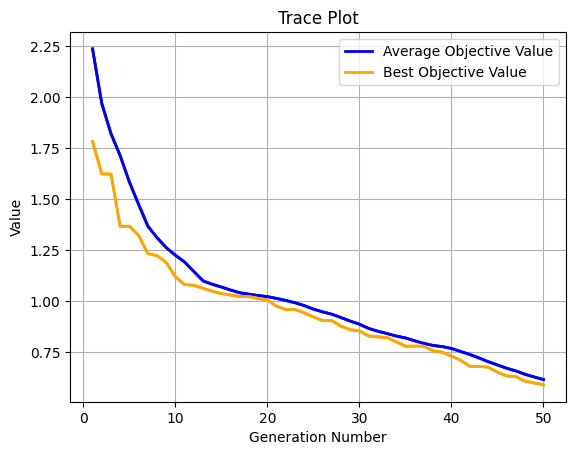

Execution time: 0.044480085372924805 s
Evaluation number: 2000
{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the generation limit.', 'optPop': <geatpy.Population.Population object at 0x0000019AB2413730>, 'lastPop': <geatpy.Population.Population object at 0x0000019AB2413100>, 'Vars': array([[5.90209961e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.36169434e-01, 0.00000000e+00,
        2.15305328e-01, 5.12176514e-01, 7.26318359e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.53674316e-07, 4.26015854e-02,
        0.00000000e+00, 2.36816406e-02, 2.90622711e-02, 0.00000000e+00,
        0.00000000e+00, 3.11768532e-01, 0.00000000e+00, 7.39135742e-02,
        0.00000000e+00, 7.29818344e-02, 0.00000000e+00, 2.86009789e-01,
        0.00000000e+00, 3.16400528e-02]]), 'ObjV': array([[0.5886935]]), 'CV': None, 'executeTime': 0.044480085372924805, 'nfev': 2000, 'startTime': '2023-01-21 20h-19m-03s', 'endTime': 

In [20]:
import numpy as np
import geatpy as ea  # import geatpy


class MyProblem_singe_obj(ea.Problem):  # 继承Problem父类

    def __init__(self, w,M=1,):
        name = 'MyProblem'  # 初始化name（函数名称，可以随意设置）
        Dim = 30  # 初始化Dim（决策变量维数）
        maxormins = [1] * M  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        varTypes = [0] * Dim  # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [0] * Dim  # 决策变量下界
        ub = [1] * Dim  # 决策变量上界
        lbin = [1] * Dim  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1] * Dim  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        self.w = w
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self,
                            name,
                            M,
                            maxormins,
                            Dim,
                            varTypes,
                            lb,
                            ub,
                            lbin,
                            ubin)

    def evalVars(self, Vars):  # 目标函数
        f1 = Vars[:, 0]
        gx = 1+9*np.sum( Vars[:,1:] , axis=1)/(self.Dim-1)
        f2 = gx * ( 1-(f1/gx)**0.5 )
        f = f1*self.w[0] + f2*self.w[1]
        f = np.expand_dims(f, axis=1)
        return f


if __name__ == '__main__':
    # 实例化问题对象
    w=[0.5,0.5]
    problem = MyProblem_singe_obj(w)
    # 构建算法
    algorithm = ea.soea_SEGA_templet(
        problem,
        ea.Population(Encoding='RI', NIND=40),
        MAXGEN=50,  # 最大进化代数。
        logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
        # trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
        maxTrappedCount=10)  # 进化停滞计数器最大上限值。
    # 求解
    res = ea.optimize(algorithm,
                      verbose=True,
                      drawing=1,
                      outputMsg=True,
                      drawLog=False,
                      saveFlag=True)
    print(res)

    